In [1]:
import json
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats  
from datetime import datetime

In [2]:
repo_feature_stat_filename = "OSLOM/repo_feature_statistics.txt"
blue = "#3333FF"
save_dir = 'charts'

reposize_teams = {}
repowatchers_teams = {}
repoforks_teams = {}
reposubscribers_teams = {}
reposize_contr_rate = {}
repowatchers_contr_rate = {}
repoforks_contr_rate = {}
reposubscribers_contr_rate = {}
cntr_test_A = []
team_cnt_test_A = []
team_member_test_A = []
cntr_test_B = []
with open(repo_feature_stat_filename) as tmj:
    cntr_test_A = json.loads(tmj.readline())
    team_cnt_test_A = json.loads(tmj.readline())
    team_member_test_A = json.loads(tmj.readline())
    cntr_test_B = json.loads(tmj.readline())

In [3]:
for i in range(len(cntr_test_A)):
    cntr_test_A[i][3] = datetime.strptime(cntr_test_A[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(cntr_test_A[i][3][0], '%Y-%m-%dT%H:%M:%SZ')
for i in range(len(team_cnt_test_A)):
    team_cnt_test_A[i][3] = datetime.strptime(team_cnt_test_A[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(team_cnt_test_A[i][3][0], '%Y-%m-%dT%H:%M:%SZ')
for i in range(len(team_member_test_A)):
    team_member_test_A[i][3] = datetime.strptime(team_member_test_A[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(team_member_test_A[i][3][0], '%Y-%m-%dT%H:%M:%SZ')
for i in range(len(cntr_test_B)):
    cntr_test_B[i][3] = datetime.strptime(cntr_test_B[i][3][1], '%Y-%m-%dT%H:%M:%SZ')-datetime.strptime(cntr_test_B[i][3][0], '%Y-%m-%dT%H:%M:%SZ')

In [4]:
cntr_test_A = np.array(cntr_test_A)
cntrs = np.asarray(cntr_test_A[:,-1],dtype=np.float32)
sizes = np.asarray(cntr_test_A[:,0],dtype=np.int32)
forks = np.asarray(cntr_test_A[:,1],dtype=np.int32)
contributors = np.asarray(cntr_test_A[:,2],dtype=np.int32)
lifetime = np.array([t.total_seconds() for t in cntr_test_A[:,3]])
max_topic_repos = np.asarray(cntr_test_A[:,4],dtype=np.int32)
max_lang_repos = np.asarray(cntr_test_A[:,5],dtype=np.int32)
mean_topic_repos = np.asarray(cntr_test_A[:,6],dtype=np.float32)
mean_lang_repos = np.asarray(cntr_test_A[:,7],dtype=np.float32)

print('\t\t\t\t\tr:\t\tp:')
r,p = stats.pearsonr(sizes,cntrs)
print('%s\t\t\t%f\t%f'%('size v. contr_rate',r,p))
r,p = stats.pearsonr(forks,cntrs)
print('%s\t\t\t%f\t%f'%('forks v. contr_rate',r,p))
r,p = stats.pearsonr(contributors,cntrs)
print('%s\t\t%f\t%f'%('# of contributors v. contr_rate',r,p))
r,p = stats.pearsonr(lifetime,cntrs)
print('%s\t\t\t%f\t%f'%('lifetime v. contr_rate',r,p))
r,p = stats.pearsonr(max_topic_repos,cntrs)
print('%s\t\t%f\t%f'%('max_topic_repos v. contr_rate',r,p))
r,p = stats.pearsonr(max_lang_repos,cntrs)
print('%s\t\t%f\t%f'%('max_lang_repos v. contr_rate',r,p))
r,p = stats.pearsonr(mean_topic_repos,cntrs)
print('%s\t\t%f\t%f'%('mean_topic_repos v. contr_rate',r,p))
r,p = stats.pearsonr(mean_lang_repos,cntrs)
print('%s\t\t%f\t%f'%('mean_lang_repos v. contr_rate',r,p))

					r:		p:
size v. contr_rate			-0.024617	0.000000
forks v. contr_rate			0.029641	0.000000
# of contributors v. contr_rate		0.127370	0.000000
lifetime v. contr_rate			-0.002159	0.146648
max_topic_repos v. contr_rate		0.044492	0.000000
max_lang_repos v. contr_rate		0.057469	0.000000
mean_topic_repos v. contr_rate		0.038566	0.000000
mean_lang_repos v. contr_rate		0.050551	0.000000


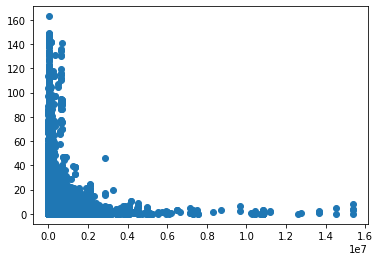

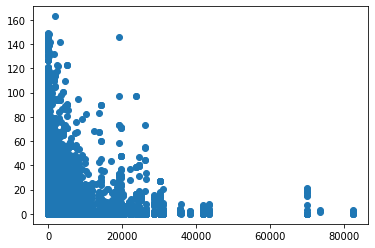

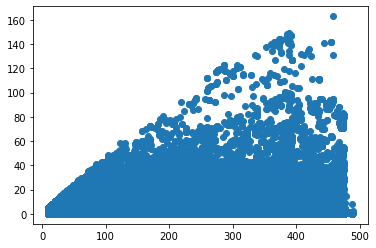

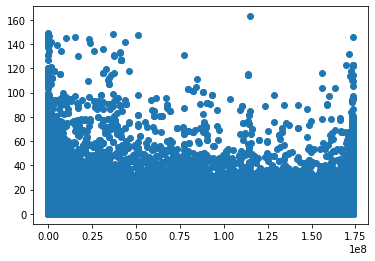

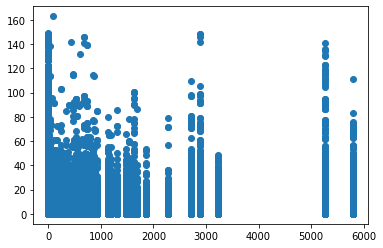

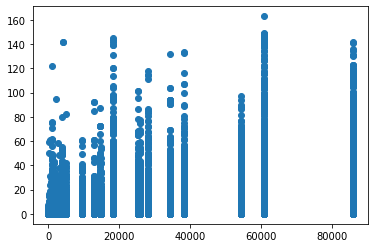

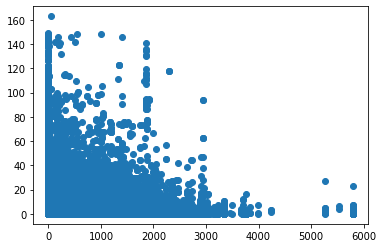

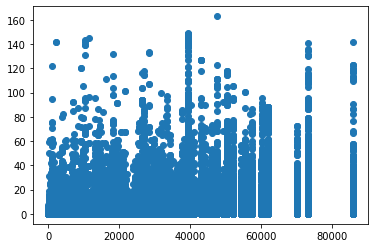

In [5]:
plt.scatter(sizes,cntrs)
plt.show()
plt.scatter(forks,cntrs)
plt.show()
plt.scatter(contributors,cntrs)
plt.show()
plt.scatter(lifetime,cntrs)
plt.show()
plt.scatter(max_topic_repos,cntrs)
plt.show()
plt.scatter(max_lang_repos,cntrs)
plt.show()
plt.scatter(mean_topic_repos,cntrs)
plt.show()
plt.scatter(mean_lang_repos,cntrs)
plt.show()

In [6]:
import pandas as pd
cntr_test_A_pd = pd.DataFrame(cntr_test_A,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','contr_rate'])
cntr_test_A_pd['size'] = pd.to_numeric(cntr_test_A_pd['size'])
cntr_test_A_pd['forks'] = pd.to_numeric(cntr_test_A_pd['forks'])
cntr_test_A_pd['contributors'] = pd.to_numeric(cntr_test_A_pd['contributors'])
cntr_test_A_pd['contr_rate'] = pd.to_numeric(cntr_test_A_pd['contr_rate'])
cntr_test_A_pd['lifetime'] = pd.to_timedelta(cntr_test_A_pd['lifetime'])
cntr_test_A_pd['max_topic_repos'] = pd.to_numeric(cntr_test_A_pd['max_topic_repos'])
cntr_test_A_pd['max_lang_repos'] = pd.to_numeric(cntr_test_A_pd['max_lang_repos'])
cntr_test_A_pd['mean_topic_repos'] = pd.to_numeric(cntr_test_A_pd['mean_topic_repos'])
cntr_test_A_pd['mean_lang_repos'] = pd.to_numeric(cntr_test_A_pd['mean_lang_repos'])

cntr_test_A_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,contr_rate
count,4.519130e+05,451913.000000,451913.000000,451913,451913.000000,451913.000000,451913.000000,451913.000000,451913.000000
mean,8.576120e+04,314.568162,112.444794,714 days 08:16:32.735613,512.901636,51820.829363,143.318421,38284.266891,2.583656
std,3.015311e+05,1799.480145,130.269391,710 days 00:30:09.489385,1285.486445,25782.215142,363.369778,20574.575282,5.853803
min,0.000000e+00,0.000000,10.000000,0 days 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000640
25%,1.262000e+03,3.000000,18.000000,25 days 23:04:41,0.000000,28081.000000,0.000000,21256.000000,0.286878
50%,8.933000e+03,21.000000,44.000000,482 days 21:48:04,0.000000,54209.000000,0.000000,39467.500000,1.036450
75%,5.611200e+04,104.000000,174.000000,1316 days 17:15:47,180.000000,85763.000000,75.666667,51991.500000,2.568765
max,1.537041e+07,82488.000000,489.000000,2007 days 23:58:03,5795.000000,85763.000000,5795.000000,85763.000000,162.996271


In [7]:
cntr_test_B_pd = pd.DataFrame(cntr_test_B,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','contr_rate'])
cntr_test_B_pd['size'] = pd.to_numeric(cntr_test_B_pd['size'])
cntr_test_B_pd['forks'] = pd.to_numeric(cntr_test_B_pd['forks'])
cntr_test_B_pd['contributors'] = pd.to_numeric(cntr_test_B_pd['contributors'])
cntr_test_B_pd['contr_rate'] = pd.to_numeric(cntr_test_B_pd['contr_rate'])
cntr_test_B_pd['lifetime'] = pd.to_timedelta(cntr_test_B_pd['lifetime'])
cntr_test_B_pd['max_topic_repos'] = pd.to_numeric(cntr_test_B_pd['max_topic_repos'])
cntr_test_B_pd['max_lang_repos'] = pd.to_numeric(cntr_test_B_pd['max_lang_repos'])
cntr_test_B_pd['mean_topic_repos'] = pd.to_numeric(cntr_test_B_pd['mean_topic_repos'])
cntr_test_B_pd['mean_lang_repos'] = pd.to_numeric(cntr_test_B_pd['mean_lang_repos'])

cntr_test_B_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,contr_rate
count,1.352398e+06,1.352398e+06,1.352398e+06,1352398,1.352398e+06,1.352398e+06,1.352398e+06,1.352398e+06,1.352398e+06
mean,3.286998e+05,1.844795e+02,1.782969e+02,422 days 11:49:25.267679,2.879930e+02,5.253958e+04,8.011099e+01,3.804023e+04,3.357653e+00
std,1.517643e+06,1.369468e+03,1.504565e+02,616 days 05:20:59.933528,9.967348e+02,2.529755e+04,2.814928e+02,1.980921e+04,7.818986e+00
min,0.000000e+00,0.000000e+00,1.000000e+01,0 days 00:00:00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.521811e-04
25%,4.257250e+03,0.000000e+00,3.200000e+01,0 days 00:00:00,0.000000e+00,3.413300e+04,0.000000e+00,2.134450e+04,2.820319e-01
50%,3.129950e+04,1.000000e+00,1.320000e+02,54 days 22:46:18,0.000000e+00,5.420900e+04,0.000000e+00,3.946750e+04,1.039602e+00
75%,1.429290e+05,2.500000e+01,3.290000e+02,678 days 08:52:14,0.000000e+00,8.576300e+04,0.000000e+00,5.199150e+04,3.067584e+00
max,2.307972e+07,8.248800e+04,4.890000e+02,2007 days 23:58:03,5.795000e+03,8.576300e+04,5.795000e+03,8.576300e+04,1.616542e+02


In [8]:
team_cnt_test_A = np.array(team_cnt_test_A)
team_cnts = np.asarray(team_cnt_test_A[:,-1],dtype=np.float32)
sizes = np.asarray(team_cnt_test_A[:,0],dtype=np.int32)
forks = np.asarray(team_cnt_test_A[:,1],dtype=np.int32)
contributors = np.asarray(team_cnt_test_A[:,2],dtype=np.int32)
lifetime = np.array([t.total_seconds() for t in team_cnt_test_A[:,3]])
max_topic_repos = np.asarray(team_cnt_test_A[:,4],dtype=np.int32)
max_lang_repos = np.asarray(team_cnt_test_A[:,5],dtype=np.int32)
mean_topic_repos = np.asarray(team_cnt_test_A[:,6],dtype=np.float32)
mean_lang_repos = np.asarray(team_cnt_test_A[:,7],dtype=np.float32)

print('\t\t\t\t\tr:\t\tp:')
r,p = stats.pearsonr(sizes,team_cnts)
print('%s\t\t\t%f\t%f'%('size v. # of teams',r,p))
r,p = stats.pearsonr(forks,team_cnts)
print('%s\t\t\t%f\t%f'%('forks v. # of teams',r,p))
r,p = stats.pearsonr(contributors,team_cnts)
print('%s\t\t%f\t%f'%('# of contributors v. # of teams',r,p))
r,p = stats.pearsonr(lifetime,team_cnts)
print('%s\t\t\t%f\t%f'%('lifetime v. # of teams',r,p))
r,p = stats.pearsonr(max_topic_repos,team_cnts)
print('%s\t\t%f\t%f'%('max_topic_repos v. # of teams',r,p))
r,p = stats.pearsonr(max_lang_repos,team_cnts)
print('%s\t\t%f\t%f'%('max_lang_repos v. # of teams',r,p))
r,p = stats.pearsonr(mean_topic_repos,team_cnts)
print('%s\t\t%f\t%f'%('mean_topic_repos v. # of teams',r,p))
r,p = stats.pearsonr(mean_lang_repos,team_cnts)
print('%s\t\t%f\t%f'%('mean_lang_repos v. # of teams',r,p))

					r:		p:
size v. # of teams			0.002848	0.120026
forks v. # of teams			0.147690	0.000000
# of contributors v. # of teams		0.292202	0.000000
lifetime v. # of teams			0.094158	0.000000
max_topic_repos v. # of teams		0.044559	0.000000
max_lang_repos v. # of teams		0.000010	0.995602
mean_topic_repos v. # of teams		0.050740	0.000000
mean_lang_repos v. # of teams		-0.007408	0.000052


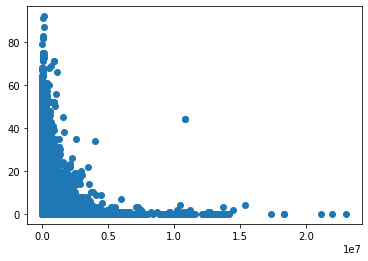

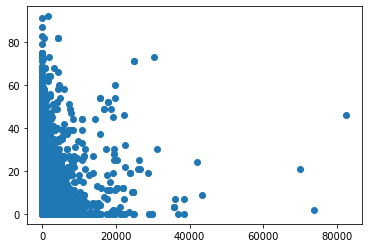

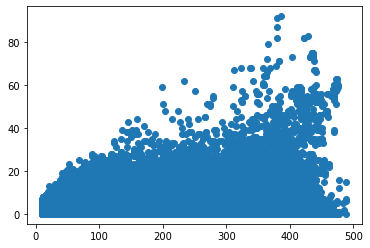

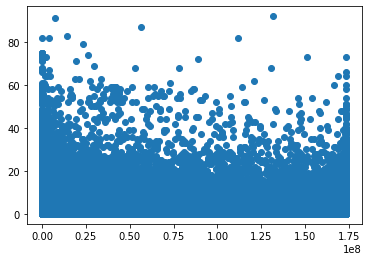

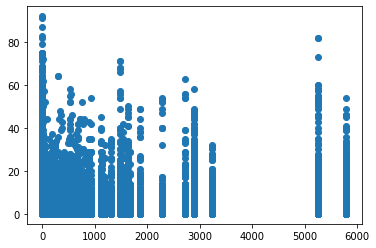

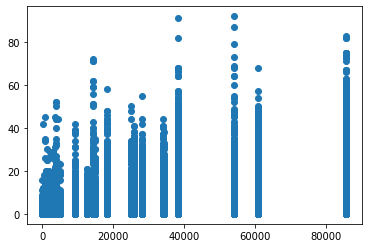

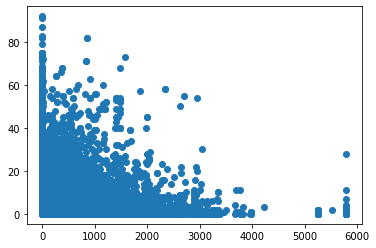

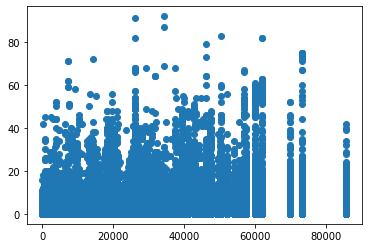

In [9]:
plt.scatter(sizes,team_cnts)
plt.show()
plt.scatter(forks,team_cnts)
plt.show()
plt.scatter(contributors,team_cnts)
plt.show()
plt.scatter(lifetime,team_cnts)
plt.show()
plt.scatter(max_topic_repos,team_cnts)
plt.show()
plt.scatter(max_lang_repos,team_cnts)
plt.show()
plt.scatter(mean_topic_repos,team_cnts)
plt.show()
plt.scatter(mean_lang_repos,team_cnts)
plt.show()

In [10]:
team_cnt_test_A_pd = pd.DataFrame(team_cnt_test_A,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','team_cnt'])
team_cnt_test_A_pd['size'] = pd.to_numeric(team_cnt_test_A_pd['size'])
team_cnt_test_A_pd['forks'] = pd.to_numeric(team_cnt_test_A_pd['forks'])
team_cnt_test_A_pd['contributors'] = pd.to_numeric(team_cnt_test_A_pd['contributors'])
team_cnt_test_A_pd['team_cnt'] = pd.to_numeric(team_cnt_test_A_pd['team_cnt'])
team_cnt_test_A_pd['lifetime'] = pd.to_timedelta(team_cnt_test_A_pd['lifetime'])
team_cnt_test_A_pd['max_topic_repos'] = pd.to_numeric(team_cnt_test_A_pd['max_topic_repos'])
team_cnt_test_A_pd['max_lang_repos'] = pd.to_numeric(team_cnt_test_A_pd['max_lang_repos'])
team_cnt_test_A_pd['mean_topic_repos'] = pd.to_numeric(team_cnt_test_A_pd['mean_topic_repos'])
team_cnt_test_A_pd['mean_lang_repos'] = pd.to_numeric(team_cnt_test_A_pd['mean_lang_repos'])

team_cnt_test_A_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,team_cnt
count,2.980010e+05,298001.000000,298001.000000,298001,298001.000000,298001.000000,298001.000000,298001.000000,298001.000000
mean,8.209456e+04,95.120476,54.056027,565 days 10:14:14.882914,390.534810,51820.191764,104.813775,38662.673441,1.516481
std,5.390226e+05,622.084841,83.659366,662 days 03:37:21.817256,1149.730175,26436.384097,317.712176,21384.487332,3.622182
min,0.000000e+00,0.000000,10.000000,0 days 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.170000e+02,0.000000,13.000000,0 days 10:00:10,0.000000,28081.000000,0.000000,20995.000000,0.000000
50%,5.331000e+03,10.000000,20.000000,248 days 16:01:06,0.000000,54209.000000,0.000000,37770.500000,0.000000
75%,3.342600e+04,46.000000,47.000000,1035 days 18:50:20,5.000000,85763.000000,3.750000,54209.000000,2.000000
max,2.307972e+07,82488.000000,489.000000,2007 days 23:58:03,5795.000000,85763.000000,5795.000000,85763.000000,92.000000


In [11]:
team_member_test_A = np.array(team_member_test_A)
team_members = np.asarray(team_member_test_A[:,-1],dtype=np.float32)
sizes = np.asarray(team_member_test_A[:,0],dtype=np.int32)
forks = np.asarray(team_member_test_A[:,1],dtype=np.int32)
contributors = np.asarray(team_member_test_A[:,2],dtype=np.int32)
lifetime = np.array([t.total_seconds() for t in team_member_test_A[:,3]])
max_topic_repos = np.asarray(team_member_test_A[:,4],dtype=np.int32)
max_lang_repos = np.asarray(team_member_test_A[:,5],dtype=np.int32)
mean_topic_repos = np.asarray(team_member_test_A[:,6],dtype=np.float32)
mean_lang_repos = np.asarray(team_member_test_A[:,7],dtype=np.float32)
team_members_ratio = team_members/contributors

print('\t\t\t\t\t\tr:\t\tp:')
r,p = stats.pearsonr(sizes,team_members_ratio)
print('%s\t\t\t%f\t%f'%('size v. team_members_ratio',r,p))
r,p = stats.pearsonr(forks,team_members_ratio)
print('%s\t\t\t%f\t%f'%('forks v. team_members_ratio',r,p))
r,p = stats.pearsonr(contributors,team_members_ratio)
print('%s\t\t%f\t%f'%('# of contributors v. team_members_ratio',r,p))
r,p = stats.pearsonr(lifetime,team_members_ratio)
print('%s\t\t\t%f\t%f'%('lifetime v. team_members_ratio',r,p))
r,p = stats.pearsonr(max_topic_repos,team_members_ratio)
print('%s\t\t%f\t%f'%('max_topic_repos v. team_members_ratio',r,p))
r,p = stats.pearsonr(max_lang_repos,team_members_ratio)
print('%s\t\t%f\t%f'%('max_lang_repos v. team_members_ratio',r,p))
r,p = stats.pearsonr(mean_topic_repos,team_members_ratio)
print('%s\t\t%f\t%f'%('mean_topic_repos v. team_members_ratio',r,p))
r,p = stats.pearsonr(mean_lang_repos,team_members_ratio)
print('%s\t\t%f\t%f'%('mean_lang_repos v. team_members_ratio',r,p))

						r:		p:
size v. team_members_ratio			-0.062657	0.000000
forks v. team_members_ratio			-0.067895	0.000000
# of contributors v. team_members_ratio		-0.264915	0.000000
lifetime v. team_members_ratio			-0.011981	0.000006
max_topic_repos v. team_members_ratio		-0.055644	0.000000
max_lang_repos v. team_members_ratio		0.007308	0.005930
mean_topic_repos v. team_members_ratio		-0.040848	0.000000
mean_lang_repos v. team_members_ratio		0.003815	0.150846


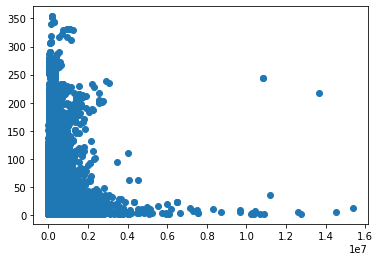

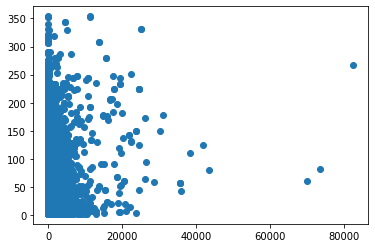

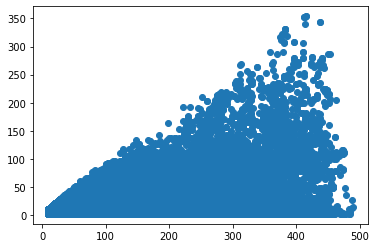

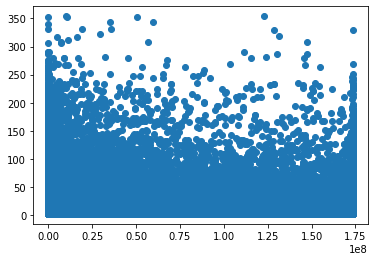

In [12]:
plt.scatter(sizes,team_members)
plt.show()
plt.scatter(forks,team_members)
plt.show()
plt.scatter(contributors,team_members)
plt.show()
plt.scatter(lifetime,team_members)
plt.show()

In [13]:
team_member_test_A_pd = pd.DataFrame(team_member_test_A,columns=['size','forks','contributors','lifetime','max_topic_repos','max_lang_repos','mean_topic_repos','mean_lang_repos','team_members'])
team_member_test_A_pd['size'] = pd.to_numeric(team_member_test_A_pd['size'])
team_member_test_A_pd['forks'] = pd.to_numeric(team_member_test_A_pd['forks'])
team_member_test_A_pd['contributors'] = pd.to_numeric(team_member_test_A_pd['contributors'])
team_member_test_A_pd['team_members'] = pd.to_numeric(team_member_test_A_pd['team_members'])
team_member_test_A_pd['lifetime'] = pd.to_timedelta(team_member_test_A_pd['lifetime'])
team_member_test_A_pd['max_topic_repos'] = pd.to_numeric(team_member_test_A_pd['max_topic_repos'])
team_member_test_A_pd['max_lang_repos'] = pd.to_numeric(team_member_test_A_pd['max_lang_repos'])
team_member_test_A_pd['mean_topic_repos'] = pd.to_numeric(team_member_test_A_pd['mean_topic_repos'])
team_member_test_A_pd['mean_lang_repos'] = pd.to_numeric(team_member_test_A_pd['mean_lang_repos'])

team_member_test_A_pd.describe()

,size,forks,contributors,lifetime,max_topic_repos,max_lang_repos,mean_topic_repos,mean_lang_repos,team_members
count,1.417840e+05,141784.000000,141784.000000,141784,141784.000000,141784.000000,141784.000000,141784.000000,141784.000000
mean,5.273474e+04,128.540294,46.366050,731 days 18:41:25.942941,482.464566,51841.471069,130.682708,38564.605128,12.941742
std,2.366606e+05,774.757690,72.456055,686 days 05:30:52.212040,1248.081635,26507.460065,345.743348,21379.700779,21.888351
min,0.000000e+00,0.000000,10.000000,0 days 00:00:00,0.000000,1.000000,0.000000,1.000000,2.000000
25%,6.690000e+02,4.000000,13.000000,60 days 18:23:27,0.000000,28081.000000,0.000000,20995.000000,4.000000
50%,3.940000e+03,19.000000,19.000000,549 days 23:14:37.500000,0.000000,54209.000000,0.000000,38211.000000,7.000000
75%,2.477525e+04,64.000000,40.000000,1304 days 20:49:39.250000,149.000000,85763.000000,61.000000,54209.000000,12.000000
max,1.537041e+07,82488.000000,489.000000,2007 days 23:58:03,5795.000000,85763.000000,5795.000000,85763.000000,354.000000


In [14]:
import statsmodels.stats.weightstats as st

cntr_A = cntrs
cntr_test_B = np.array(cntr_test_B)
cntr_B = np.asarray(cntr_test_B[:,-1],dtype=np.float32)
t,p_twotail,df=st.ttest_ind(cntr_A,cntr_B,usevar='unequal')
print(t,p_twotail,df)

-70.35389213994279 0.0 1029142.9891961479


In [15]:
print(cntr_A.mean(),cntr_B.mean())

2.5836563 3.3576543


In [16]:
from scipy import stats
t,p_twotail=stats.ttest_1samp(cntr_A,1)
p_onetail=p_twotail/2
print(t,p_onetail,cntr_A.size-1)

181.86546995594105 0.0 451912


In [17]:
CI = 1.6449*stats.sem(cntr_A)
print(cntr_A.mean(),cntr_A.std())
print(cntr_A.mean()-CI,cntr_A.mean()+CI)
print((cntr_A.mean()-1)/cntr_A.std())

2.5836563 5.8537965
2.5693327765548175 2.597979845515495
0.2705349111267311
